In [62]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt
import corner

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood_2, chi_squared

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
# get dataset
clusters, variances = load_clusters(nrows=20)

UnitTypeError: Can only apply 'log10' function to dimensionless quantities

In [4]:
T_data = [c.baryon_temp for c in clusters]

In [29]:
ndim, nwalkers = 2, 10
log_sigma0 = np.random.uniform(low=-40, high=-15, size=(nwalkers, 1)).astype(dtype=np.float128)
log_mchi = np.random.uniform(low=-10, high=0, size=(nwalkers, 1)).astype(dtype=np.float128)

p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((nwalkers,))
p0[:,1]= log_mchi.reshape((nwalkers,))
p0

array([[-30.40188888,  -8.92812292],
       [-18.3732657 ,  -5.88129433],
       [-21.34136199,  -1.3107406 ],
       [-32.88930946,  -5.48977048],
       [-20.82881661,  -9.21034948],
       [-29.75557373,  -4.84293648],
       [-37.44190988,  -9.28104156],
       [-27.90304774,  -3.73528596],
       [-18.20194415,  -2.39235041],
       [-16.06760009,  -4.00205401]])

In [30]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood_2, args=[T_data, variances, clusters, 'pred_T_b'])

In [31]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

[-30.40188888  -8.92812292]
[-18.3732657   -5.88129433]
[-21.34136199  -1.3107406 ]
[-32.88930946  -5.48977048]
[-20.82881661  -9.21034948]
[-29.75557373  -4.84293648]
[-37.44190988  -9.28104156]
[-27.90304774  -3.73528596]
[-18.20194415  -2.39235041]
[-16.06760009  -4.00205401]


[-29.40939822  -6.86563   ]
[-21.35791795  -9.04712536]
[-24.60333288  -5.31295273]
[-10.88884066  -1.37998861]
[-18.32939956  -4.98796537]
[-36.3083495   -6.72707006]
[-26.67108178  -1.17513989]
[-8.38170806 -2.82167192]
[-20.43479073  -1.33380592]
[-13.96118829  -2.02372722]
[-18.15557852  -1.44811964]
[-2.72710043 -1.13875671]
[-28.21007152  -7.19335658]
[-18.8277274   -6.49742005]
[-26.62318817  -5.11534572]
[-34.39416825  -8.33905948]
[-29.69958874  -1.09808749]
[-13.50492059  -6.1026002 ]
[-27.22387464  -5.90193977]
[-19.08488917  -7.38541849]
[-34.63937029  -8.64727615]
[-1.65760447 -1.1371316 ]
[-31.74245114  -7.11900896]
[-21.73186398  -1.93991367]
[-20.27231771  -2.47850688]
[-13.83816448  -1.36673606]
[-34.33476494  -7.06444734]
[-20.26018988  -2.52862375]
[-30.86828761  -8.29800208]
[-0.38059538 -1.12375607]
[-10.78429783  -5.90079768]
[-22.47398836  -2.69493848]
[-26.29969125  -4.97524286]
[-15.99839257  -7.4503814 ]
[-27.71301302  -1.14173891]
[-27.9187968   -4.64540112]


[-13.34784668  -2.26446657]
[-12.03117535  -0.86385297]
[-19.74034829  -8.72975591]
[-19.48541826  -8.71666253]
[-19.70952062  -6.30281702]
[-19.88406293  -9.01003595]
[-14.89352062  -1.07556145]
[-19.63451928  -5.29507201]
[-19.58055367  -7.04291021]
[-19.7663668   -8.64725258]
[-19.4653968   -0.50789178]
[-19.63678732  -5.22161479]
[-19.84236804  -9.78153484]
[-19.76257067  -5.47746646]
[-9.13858662 -3.6463223 ]
[-19.82157824  -9.63832749]
[-13.68739581  -1.07956676]
[-19.41199252  -8.49262636]
[-21.85982023  -9.63233267]
[-19.44249537  -0.12491612]
[-19.73837546  -7.19017013]
[-19.6361536   -4.22234741]
[-19.73094618  -7.79320086]
[-19.78168351  -9.52620853]
[-34.26602415  -9.43197296]
[-19.60486182  -7.252791  ]
[-19.49181308  -1.19625943]
[-13.76632133  -0.27517132]
[-19.69725218  -7.70093472]
[-21.4601657   -9.58217259]
[-19.56881325  -3.59695739]
[-19.76129366  -4.41115644]
[-19.60445621  -7.24841962]
[-25.55676796  -0.75663155]
[-19.75650384  -7.37008108]
[-19.62991716  -1.9544

[-16.99263157  -5.99566068]
[-21.12280227  -0.90477542]
[-18.80802334  -0.93263958]
[-13.01448265  -1.56965341]
[-19.75171696  -6.53953169]
[-19.19651582  -4.11742207]
[-16.32800453  -4.00691767]
[-19.75950457  -9.40632085]
[-18.52481636  -1.49372737]
[-19.75545496  -9.6810548 ]
[-19.8530913   -9.37697958]
[-19.74700901  -4.60773138]
[-19.19540485  -4.10831456]
[-19.61382449  -1.96027834]
[-19.75482512  -9.97933903]
[-19.52317577  -0.51353577]
[-18.76926031  -6.03664961]
[-19.84204178  -8.54680031]
[-19.7519025   -6.60783497]
[-19.75874801  -7.70647019]
[-19.76285064  -6.55625677]
[-25.85589461  -2.9034439 ]
[-19.61494684  -3.28114871]
[-13.48002777  -0.25086313]
[-19.6399809   -3.94931559]
[-19.74883555  -6.62228382]
[-19.74572749  -5.08431819]
[-18.87313855  -2.72484705]
[-14.01600315  -0.3423712 ]
[-19.60063849  -5.85771486]
[-19.75972434  -9.46366698]
[-19.71574429  -7.9273567 ]
[-19.63845365  -3.869126  ]
[-19.73349687  -3.14986917]
[-19.74072821  -4.50670747]
[-19.69068984  -5.61

In [32]:
n_steps=1000
sampler.run_mcmc(state, n_steps, progress=True)

[-15.96444163  -2.48677168]
[-20.01014005  -1.77934502]
[-20.44944211  -0.72225486]
[-19.5649482   -4.87918621]
[-19.63981857  -0.91491781]
[-19.64001297  -5.71463681]
[-19.75137923  -6.81883342]
[-19.80423084  -4.85847466]
[-19.75088536  -7.92912432]
[-19.66651703  -5.26534305]
[-19.8139411   -9.11055336]
[-19.63594096  -1.90996571]
[-19.54847083  -3.74335559]
[-19.75323133  -7.59854417]
[-19.55362381  -0.93630109]
[-19.55138813  -1.24455597]
[-19.76460803  -4.84698084]
[-19.65257526  -1.51836234]
[-19.75815712  -7.68500347]
[-19.76181909  -5.69262925]
[-19.05400546  -9.05452261]
[-19.74663772  -1.77288975]
[-19.47420687  -0.60872263]
[-13.74719057  -0.22254538]
[-19.75630196  -8.69434474]
[-19.66481853  -5.57305251]
[-14.98515266  -3.65460218]
[-19.69064358  -3.79492651]
[-19.73776574  -4.2019436 ]
[-25.34732104  -1.47580008]
[-19.75729013  -9.47488504]
[-20.44401181  -9.36882655]
[-19.75665174  -7.25944988]
[-19.55849607  -1.53542001]
[-19.76219292  -1.72512149]
[-19.62355041  -2.41

[-12.24882795  -0.14869656]
[-19.75365306  -7.28524985]
[-19.69836664  -1.60548555]
[-19.48422934  -0.69642316]
[-19.71406924  -4.38096708]
[-19.69208259  -6.17476611]
[-19.6640671   -6.09684352]
[-19.367099    -0.39264043]
[-14.73941614  -0.36599592]
[-19.75386339  -5.60222318]
[-19.51363096  -0.73696623]
[-19.75407702  -7.3767686 ]
[-19.75212634  -1.90384148]
[-19.66980154  -5.32300333]
[-18.9859204   -0.73649581]
[-18.67280179  -7.92512249]
[-18.83036344  -0.50650913]
[-19.50755524  -0.80155359]
[-19.75355319  -4.94176437]
[-19.51298396  -0.71909962]
[-19.60710067  -2.66235945]
[-19.43658723  -0.57286124]
[-19.63887484  -4.41537355]
[-19.75263862  -2.99453709]
[-19.63923628  -5.84363522]
[-19.502087    -0.74273781]
[-18.58261929  -4.29291477]
[-19.09758494  -0.68591006]
[-19.75376512  -6.5016848 ]
[-19.65097149  -0.98003893]
[-19.67886931  -1.50135738]
[-19.76103906  -8.80916248]
[-19.58195002  -3.27202597]
[-19.73009598  -7.17667654]
[-19.63906285  -2.62016133]
[-19.38919207  -0.48

[-19.93388477  -9.21715693]
[-19.35909032  -0.4885094 ]
[-19.75225131  -2.27699934]
[-19.32301975  -0.47158761]
[-19.7570863   -6.34078882]
[-19.95142424  -2.63426187]
[-19.26445657  -0.3842114 ]
[-19.75640527  -6.99263448]
[-20.1462109   -4.01479607]
[-19.39117135  -0.52537772]
[-19.75732212  -4.56655653]
[-26.16742471  -0.7929254 ]
[-19.73763894  -6.10007731]
[-19.55849198  -4.18105201]
[-19.40504846  -0.54035179]
[-19.75176842  -2.09593896]
[-20.22853027  -8.65131927]
[-19.52269568  -2.24617277]
[-19.7523388   -2.30980634]
[-19.2556813   -0.39048505]
[-19.408186    -1.45200933]
[-19.364559    -0.49666172]
[-19.75582608  -7.54700844]
[-19.7546651   -4.28500877]
[-19.9490146   -2.95503413]
[-19.27513573  -0.4334227 ]
[-12.61311139  -0.4733966 ]
[-19.7576126   -5.83704187]
[-19.41342184  -0.54301062]
[-19.75785236  -3.51019537]
[-19.29000121  -0.52311356]
[-19.38558344  -0.66292683]
[-19.74925294  -0.48567429]
[-19.50164237  -3.90991827]
[-19.24813043  -0.32723664]
[-10.98723815  -0.03

[-19.16800472  -1.57648517]
[-19.75835172  -1.44061886]
[-19.75932132  -5.46370973]
[-19.18393288  -0.38678428]
[-19.75180473  -1.76280601]
[-19.01277333  -0.24217582]
[-19.75199634  -3.75181554]
[-19.18073368  -0.38445423]
[-20.32083339  -2.87243104]
[-19.01169291  -0.24183114]
[-18.7850511   -0.09626968]
[-19.79676829  -5.79244601]
[-19.76369853  -3.69669389]
[-19.29460869  -4.18742587]
[-19.48983342  -1.13028292]
[-19.70841456  -2.72722713]
[-21.99380458  -0.31956214]
[-19.75868807  -4.79306289]
[-19.75446375  -2.1951529 ]
[-18.84450436  -0.15505407]
[-13.14315996  -1.24024381]
[-19.28081106  -0.62593157]
[-19.75411704  -1.91839919]
[-20.20569385  -4.57183058]
[-19.76220128  -9.00876314]
[-19.0480901   -0.28784691]
[-21.87931545  -5.9319297 ]
[-18.59361785  -1.52746572]
[-19.01944703  -0.24837345]
[-15.36312341  -0.13899335]
[-19.7585186  -5.5141648]
[-19.74868112  -1.78393005]
[-19.38601724  -0.52451364]
[-19.16619233  -2.04658907]
[-12.826114   -0.1128785]
[-20.31422768  -3.183260

[-19.72470572  -1.46903265]
[-19.29183345  -0.94531554]
[-19.75962788  -4.5948673 ]
[-18.5394848   -0.07807618]
[-19.21594821  -3.68326734]
[-19.59373385  -1.62161535]
[-20.09197167  -2.51133202]
[-14.59897459  -0.05280506]
[-19.63104974  -1.61552609]
[-19.85587413  -1.67444285]
[-19.45822854  -1.38846141]
[-18.917486    -0.20365444]
[-18.17032454  -5.36212673]
[-18.98904052  -0.35821027]
[-18.32563935  -0.18934662]
[-21.30448923  -5.38991538]
[-15.7794223   -0.06002168]
[-19.74530772  -1.0377385 ]
[-19.73376996  -3.22308425]
[-19.23218324  -2.58883712]
[-10.98005599  -0.04968647]
[-19.35999538  -3.55756289]
[-19.38943632  -2.66456315]
[-18.98987125  -0.76374137]
[-19.7380536   -3.50172962]
[-22.03582263  -8.1931058 ]
[-19.745093    -1.86798837]
[-20.31046445  -2.38633289]
[-19.92510899  -5.40823086]
[-15.11916084  -0.12154993]
[-19.76347497  -8.97139613]
[-19.36938047  -1.14489528]
[-18.99403084  -0.61015907]
[-19.71633414  -1.30521051]
[-19.73309637  -2.30098262]
[-19.75758338  -2.26

[-19.0351059   -1.80377373]
[-18.58512583  -0.1119891 ]
[-19.7542931   -3.45689848]
[-19.43203423  -1.18580624]
[-19.19296432  -3.64703906]
[-20.11220895  -2.09663238]
[-19.67609509  -1.30309465]
[-18.3818648   -0.03470388]
[-19.76108327  -1.68109541]
[-15.44458288  -0.07858109]
[-20.41706134  -5.75849887]
[-19.97365778  -1.88194361]
[-18.66402088  -0.31270718]
[-11.66714195  -0.33060519]
[-19.75777002  -9.57114848]
[-18.73947989  -0.0589599 ]
[-19.72504494  -2.37926555]
[-18.80844992  -0.16840447]
[-19.3327217   -5.37861304]
[-20.55447532  -2.44596082]
[-20.01115899  -1.67482843]
[-18.41322192  -2.93847341]
[-19.08443476  -0.81603833]
[-13.44520952  -2.77943523]
[-18.82275282  -0.40793735]
[-14.18429984  -0.51640994]
[-19.23379971  -5.9394929 ]
[-18.82676984  -0.15768759]
[-19.28920582  -1.04171011]
[-18.97182948  -0.92801303]
[-18.64320749  -0.12666149]
[-20.03634111  -4.43636878]
[-19.6919676   -1.49250324]
[-18.5303343   -0.08324865]
[-19.40552918  -6.72979017]
[-19.73835605  -1.91

[-28.31295452  -2.88690788]
[-18.93861007  -0.53449225]
[-20.28150479  -2.01406007]
[-18.22400827  -0.03502906]
[-21.34455589  -1.78562576]
[-20.54878146  -2.07409236]
[-12.28164443  -0.04294779]
[-19.67622978  -1.22424416]
[-19.0059947  -0.513065 ]
[-18.86481016  -0.58020602]
[-14.6305959   -0.58592827]
[-20.44028633  -2.22190075]
[-20.67472173  -2.68355657]
[-19.68092778  -1.25707029]
[-14.98384333  -0.0395672 ]
[-20.79940325  -1.36633522]
[-19.27890071  -1.01938649]
[-16.69258184  -0.85587925]
[-18.76471137  -0.34470013]
[-19.71124057  -1.46887368]
[-18.99063099  -0.72204324]
[-13.97309836  -0.05386733]
[-19.65036107  -1.04349271]
[-19.6166662   -0.99803673]
[-19.07839132  -0.64412629]
[-18.28571885  -7.99410757]
[-20.20442034  -0.09409497]
[-21.78021003  -1.71516425]
[-15.94543873  -0.03351764]
[-15.03569842  -0.78857719]
[-19.75918415  -9.41320818]
[-17.04991423  -1.02466496]
[-18.14653961  -0.02966496]
[-19.72524476  -1.71591719]
[-18.55974799  -0.57106033]
[-19.43729175  -0.8346

[-19.6179966   -0.99989265]
[-19.6211933   -1.00014234]
[-18.84594039  -0.4974518 ]
[-14.07394937  -0.02828863]
[-19.66481002  -1.08499319]
[-19.81888389  -0.82349861]
[-18.1823792   -0.04639863]
[-19.66758723  -1.1401398 ]
[-19.49402767  -0.67674885]
[-20.15078389  -1.36676041]
[-20.39470628  -0.79317713]
[-18.14185626  -0.0305159 ]
[-19.41590575  -0.88199117]
[-24.16558013  -1.29506408]
[-18.1308281  -0.0292655]
[-15.98025356  -0.30364799]
[-18.47378573  -0.19882418]
[-19.64530159  -1.07106727]
[-19.49958158  -0.67607868]
[-18.23734831  -0.04134301]
[-19.11078688  -0.66885314]
[-19.1664171   -0.52114259]
[-18.85059142  -0.35832196]
[-20.0588482   -1.31834055]
[-19.00146531  -0.43219241]
[-18.33439835  -6.96357284]
[-19.64181612  -1.03065465]
[-19.10213999  -0.02781292]
[-19.48075625  -0.64215487]
[-12.66975364  -0.02768098]
[-19.60489182  -0.98296833]
[-20.84432078  -1.3084172 ]
[-15.86831458  -0.3313401 ]
[-20.00269525  -1.25061457]
[-20.36365435  -1.52784015]
[-19.50519562  -0.6539

[-19.45799231  -0.5095833 ]
[-19.45771469  -0.60019544]
[-18.141012    -0.03925566]
[-19.51104805  -0.62571636]
[-19.50063083  -0.75628793]
[-19.36156017  -0.55679424]
[-18.13141483  -0.02967515]
[-20.13810551  -0.89323378]
[-19.08248049  -0.4383871 ]
[-22.35702405  -0.03134515]
[-18.1501086   -0.03111608]
[-19.49369851  -0.73859643]
[-18.7844765   -0.31036931]
[-19.50266368  -0.79609746]
[-19.41458143  -0.58072641]
[-13.31055382  -0.04154694]
[-19.31065578  -0.44594813]
[-20.29030909  -0.96049884]
[-18.64374531  -0.30017597]
[-18.94515929  -0.37745   ]
[-18.30815486  -1.13176046]
[-19.24466114  -0.38011506]
[-19.71635622  -8.80630759]
[-19.42474886  -0.70294961]
[-19.31337638  -0.53986559]
[-19.45787876  -0.66712179]
[-18.55546314  -0.16447377]
[-19.67498639  -0.80938682]
[-18.90319152  -0.02998017]
[-19.69694471  -7.70580101]
[-20.6281067   -1.09854557]
[-19.85515636  -0.57229345]
[-19.66889758  -6.71377495]
[-19.47273947  -0.69677482]
[-18.13952086  -0.03081117]
[-20.56269972  -1.07

[-18.95968627  -0.3413189 ]
[-19.48231088  -8.07657838]
[-18.73784869  -0.2440548 ]
[-19.32986832  -0.49762676]
[-18.97367779  -0.24376277]
[-19.05631485  -0.36300617]
[-18.16762336  -0.06239967]
[-17.94674921  -0.02824991]
[-18.78493439  -0.35270853]
[-17.8362422   -0.02851123]
[-18.1656431   -0.02821563]
[-17.48283964  -0.02832736]
[-19.26043745  -0.39742583]
[-19.18220711  -0.35648969]
[-18.18538972  -0.02921712]
[-17.94754633  -0.1115857 ]
[-19.21342167  -0.37282355]
[-18.37085315  -0.11156518]
[-17.994561   -0.0285573]
[-19.19616218  -0.38343195]
[-18.96492427  -0.36096578]
[-19.27617944  -3.84242921]
[-18.11956304  -0.02894063]
[-18.16817021  -0.15070709]
[-19.52816856  -5.8850556 ]
[-18.12968295  -0.06846351]
[-19.07664336  -0.39956636]
[-19.26552545  -1.51591018]
[-18.67904965  -0.20716872]
[-18.14971333  -0.02903309]
[-17.98905605  -0.02810096]
[-17.04326999  -0.02783304]
[-18.64684763  -0.22173243]
[-20.22745864  -0.83374836]
[-19.61466361  -0.47589941]
[-18.00536526  -0.0323

[-18.0981712  -0.0286015]
[-17.98703853  -0.02794755]
[-17.95773612  -0.02932905]
[-17.99216936  -0.0285381 ]
[-18.13594403  -0.06572385]
[-19.75560942  -9.57571649]
[-19.79043046  -0.40856536]
[-18.54820944  -0.17393631]
[-18.0829396   -0.02835209]
[-18.89768844  -0.22005025]
[-18.79069083  -0.22861335]
[-17.97543863  -0.02789862]
[-17.98623009  -0.02997531]
[-18.15979221  -0.04643435]
[-18.11195011  -0.02871741]
[-17.97761457  -0.02893898]
[-19.55357286  -0.35876608]
[-19.11558766  -0.32244926]
[-18.59470614  -3.14254628]
[-17.99298882  -0.0285139 ]
[-18.06814278  -0.03365556]
[-20.14328932  -0.58637519]
[-18.14029515  -0.02895584]
[-17.97780862  -0.02835579]
[-17.98013891  -0.0288053 ]
[-17.8931477   -0.02843074]
[-18.03674443  -0.02815723]
[-18.03841134  -0.02809882]
[-18.08468155  -0.02850394]
[-18.0328844   -0.04920778]
[-18.49842421  -0.15358534]
[-18.31802888  -1.86535676]
[-19.41461909  -7.68611135]
[-18.00224668  -0.02830395]
[-18.47766848  -0.13253869]
[-19.07698084  -0.3114

[-18.05041743  -0.02905674]
[-18.72434469  -0.14353446]
[-18.04191975  -0.02823848]
[-18.01393286  -0.02841979]
[-18.04209693  -0.02845977]
[-19.04575196  -5.67195595]
[-18.44867799  -0.0969053 ]
[-18.42638219  -0.11459034]
[-18.03347894  -0.027731  ]
[-18.07497882  -0.03055574]
[-18.0419256   -0.02824578]
[-18.01530678  -0.0287938 ]
[-18.20429144  -0.06819026]
[-18.56030939  -0.14626113]
[-18.17793662  -0.78600593]
[-18.04005204  -0.03268293]
[-19.54097496  -8.3799205 ]
[-18.33050484  -0.07828945]
[-18.0329172   -0.02812469]
[-18.43523216  -0.09638372]
[-18.04309297  -0.02855102]
[-17.98224038  -0.0295917 ]
[-18.08765744  -0.04382263]
[-18.07642788  -0.02774104]
[-18.45925869  -0.12145208]
[-18.03347929  -0.02810333]
[-18.05172582  -0.02773527]
[-18.70616598  -2.581835  ]
[-18.20487279  -0.06484186]
[-18.11059942  -0.04029529]
[-18.50407224  -0.14400519]
[-18.04017907  -0.0277891 ]
[-18.01710308  -0.02772718]
[-19.69749475  -9.2519163 ]
[-18.21601575  -0.06734444]
[-18.01509185  -0.02

[-18.03058591  -0.0280707 ]
[-18.03418295  -0.028216  ]
[-18.03635603  -0.02841535]
[-18.60014459  -3.20489491]
[-18.02642752  -0.0286412 ]
[-18.03879625  -0.03036752]
[-17.99252048  -0.02801816]
[-18.01751768  -0.02826729]
[-18.05662409  -0.02834541]
[-18.03658568  -0.02774334]
[-18.01194062  -0.02773433]
[-18.23448799  -1.33835064]
[-18.02484181  -0.02899019]
[-18.02408869  -0.02884792]
[-18.04442874  -0.03194319]
[-18.03391933  -0.0282698 ]
[-17.9965032   -0.02784287]
[-19.1808137   -6.38312874]
[-18.04646615  -0.02846094]
[-17.98619267  -0.02800942]
[-18.01558162  -0.02829641]
[-18.04951593  -0.02774807]
[-18.0294827   -0.02883245]
[-18.04347272  -0.03237901]
[-17.99586326  -0.02780208]
[-18.03204957  -0.02815812]
[-19.27993073  -6.93365447]
[-18.04008916  -0.03092364]
[-18.01597866  -0.02835771]
[-18.02375608  -0.02788858]
[-17.9855179   -0.02797917]
[-18.0279492   -0.02811778]
[-18.01618762  -0.02790651]
[-18.08636863  -0.29486631]
[-18.05321001  -0.02873978]
[-18.03561705  -0.02

[-17.94234642  -0.02770935]
[-19.52643334  -8.32361489]
[-18.05798988  -0.02805057]
[-17.99970517  -0.02795466]
[-18.00598811  -0.0278899 ]
[-17.97094769  -0.02815718]
[-18.02571445  -0.02793999]
[-18.02747844  -0.0282493 ]
[-18.05414023  -0.02769806]
[-18.00181015  -0.02787929]
[-18.0840652   -0.02801864]
[-18.02110045  -0.02823891]
[-17.97440469  -0.02788836]
[-17.97716518  -0.02812286]
[-18.04663252  -0.02793934]
[-18.01570262  -0.02798099]
[-18.04324028  -0.02798449]
[-18.00445741  -0.02792864]
[-17.94062357  -0.02802635]
[-18.09768653  -0.02811589]
[-18.0358821   -0.02798355]
[-17.95304653  -0.02793933]
[-18.05149445  -0.0279265 ]
[-18.00798504  -0.02796829]
[-18.03332673  -0.0282712 ]
[-18.05503494  -0.02767343]
[-17.99572722  -0.02787351]
[-17.97618714  -0.02803978]
[-18.01035989  -0.02797394]
[-18.05739224  -0.02797429]
[-18.09974124  -0.02785392]
[-18.03559546  -0.02798819]
[-18.00306547  -0.02781196]
[-17.99930067  -0.0278769 ]
[-17.91306314  -0.02813473]
[-18.04812879  -0.02

[-18.02474061  -0.02803365]
[-17.99978818  -0.0277647 ]
[-17.99758423  -0.0279073 ]
[-17.97476905  -0.02793962]
[-17.99549288  -0.02788837]
[-18.00505812  -0.0277054 ]
[-18.07169089  -0.02800017]
[-17.9564578   -0.02796732]
[-18.04279531  -0.02779774]
[-18.0470685   -0.02771129]
[-18.0052155   -0.02772769]
[-17.95874915  -0.02792961]
[-18.0532889   -0.02777764]
[-17.92613527  -0.02811559]
[-18.01593418  -0.02784921]
[-19.35103174  -7.32373085]
[-17.9654719  -0.0276733]
[-18.00149725  -0.02772428]
[-17.98169573  -0.02791643]
[-18.03252849  -0.02781741]
[-19.60068397  -8.75250546]
[-18.04915245  -0.02773352]
[-18.03288943  -0.02792586]
[-18.03641073  -0.02788499]
[-18.05505395  -0.02779646]
[-17.98656964  -0.02767686]
[-18.01219201  -0.02779295]
[-17.98087788  -0.0278985 ]
[-19.22275788  -6.65126502]
[-18.05516643  -0.02771898]
[-18.04780799  -0.02799331]
[-18.00880483  -0.02774203]
[-17.98241139  -0.02775151]
[-18.02201187  -0.02782903]
[-17.98935762  -0.02769127]
[-18.01692487  -0.0278

[-17.99862067  -0.02801019]
[-18.00561153  -0.02818294]
[-18.06167224  -0.02777832]
[-18.00282837  -0.02768066]
[-17.99733471  -0.02811091]
[-18.01201554  -0.02816904]
[-18.07739267  -0.02780441]
[-17.94348113  -0.02788267]
[-19.25492497  -6.83407545]
[-18.02295221  -0.02814541]
[-17.97781114  -0.02782066]
[-18.0001091   -0.02814626]
[-18.01561609  -0.02816126]
[-18.06773813  -0.02774696]
[-18.29541084  -1.733531  ]
[-18.00057231  -0.02806695]
[-18.00192694  -0.02817918]
[-19.56625471  -8.5587625 ]
[-17.99400175  -0.02773005]
[-18.0401891   -0.02799206]
[-17.98217122  -0.02789738]
[-18.01406117  -0.02811984]
[-17.99549339  -0.02785827]
[-18.01091621  -0.02819548]
[-18.07053972  -0.0277275 ]
[-18.00996203  -0.027909  ]
[-17.98854838  -0.02794186]
[-18.00654008  -0.02831215]
[-18.01049279  -0.02820567]
[-18.02725839  -0.02772894]
[-17.97065455  -0.02802677]
[-17.99200216  -0.0276854 ]
[-18.01055689  -0.02822363]
[-18.11166179  -0.02772613]
[-17.98464248  -0.02775555]
[-18.03904614  -0.02

[-17.96607318  -0.02835791]
[-18.03266325  -0.02795138]
[-18.04810102  -0.02789232]
[-17.96626963  -0.02810779]
[-19.65187739  -9.00127226]
[-18.01454728  -0.0279453 ]
[-18.03473455  -0.02772249]
[-18.02893571  -0.02805586]
[-18.02679015  -0.02801328]
[-17.92334611  -0.02875332]
[-17.98957615  -0.02818542]
[-18.0321659   -0.02771298]
[-17.98561838  -0.02799724]
[-18.04921167  -0.02771621]
[-18.01131784  -0.02808485]
[-18.03347765  -0.02770478]
[-17.97828117  -0.02826368]
[-18.02741547  -0.02817337]
[-17.96111385  -0.0280853 ]
[-17.96235478  -0.02855522]
[-18.75599018  -4.03629232]
[-18.04579635  -0.33212315]
[-18.03095027  -0.02790014]
[-18.02777219  -0.02815828]
[-18.03569277  -0.02823947]
[-17.98773439  -0.02809063]
[-17.93748266  -0.02828089]
[-19.47072963  -8.0015483 ]
[-18.02859684  -0.02787841]
[-18.05135688  -0.02775943]
[-18.03459695  -0.02794027]
[-18.0591376   -0.02809148]
[-17.96085486  -0.0284114 ]
[-18.08538895  -0.02821851]
[-17.99204291  -0.02794649]
[-18.92237278  -4.88

[-18.04925669  -0.02774253]
[-19.05753147  -5.81005012]
[-17.97656413  -0.0280856 ]
[-17.99096367  -0.02776583]
[-18.00703609  -0.02807122]
[-18.02218724  -0.0277325 ]
[-18.03754298  -0.02871761]
[-18.66624772  -3.56037761]
[-18.0018624   -0.02769721]
[-17.97594366  -0.0280859 ]
[-19.41411157  -7.76729866]
[-18.05725962  -0.02818373]
[-18.03645944  -0.02774391]
[-18.07405935  -0.02946378]
[-17.96065794  -0.02781833]
[-18.02357103  -0.02780565]
[-18.04643988  -0.02774283]
[-18.0076839   -0.02773686]
[-18.07691505  -0.02835634]
[-18.03198797  -0.02865264]
[-18.04852167  -0.41745564]
[-18.08884836  -0.02778038]
[-19.70792534  -9.30765313]
[-18.02761528  -0.02873377]
[-18.02901715  -0.02783286]
[-17.96552417  -0.02795525]
[-18.06649422  -0.02774488]
[-18.06406005  -0.02805754]
[-17.95748097  -0.02781765]
[-18.17287387  -0.9300811 ]
[-18.0371304   -0.02829795]
[-17.96220988  -0.02789855]
[-19.14912519  -6.20736884]
[-18.02089946  -0.0277401 ]
[-18.00369964  -0.02770639]
[-17.92037858  -0.02

[-19.21136976  -6.51362109]
[-18.01420566  -0.02809708]
[-18.02818147  -0.02851216]
[-18.04361256  -0.02820969]
[-19.40388064  -7.59675912]
[-18.00990102  -0.02783913]
[-18.02518445  -0.02781657]
[-18.06649057  -0.02928147]
[-17.99395252  -0.02830537]
[-18.04112957  -0.0288141 ]
[-18.02085144  -0.02782296]
[-18.10372443  -0.02963436]
[-18.05220491  -0.02830413]
[-18.07514419  -0.02772572]
[-18.01221328  -0.02783571]
[-18.01183408  -0.02842398]
[-18.06036883  -0.02975446]
[-17.99046449  -0.02773298]
[-19.68132043  -9.16897904]
[-18.01075572  -0.02786581]
[-18.06541783  -0.02832593]
[-18.02737623  -0.02787168]
[-18.01273566  -0.02889065]
[-18.05906945  -0.02941104]
[-18.03992463  -0.02828387]
[-18.04333261  -0.02778415]
[-18.90643309  -4.95657093]
[-18.07535792  -0.02844462]
[-17.99687524  -0.02822477]
[-18.00486405  -0.02779096]
[-18.04245335  -0.02819521]
[-18.01130449  -0.02785162]
[-18.06856517  -0.02878885]
[-17.98614624  -0.02776209]
[-18.00190138  -0.0281771 ]
[-18.03383408  -0.02

[-18.02290402  -0.02784068]
[-18.00017588  -0.02782238]
[-18.01677027  -0.02835915]
[-19.25936922  -6.84124136]
[-17.99893191  -0.02782372]
[-18.04094236  -0.02861594]
[-18.05542116  -0.02805783]
[-17.99966479  -0.02789453]
[-18.02922416  -0.02788288]
[-17.94918243  -0.02772136]
[-18.38295919  -2.24487593]
[-18.01728397  -0.02783158]
[-17.97293394  -0.02784814]
[-18.01001466  -0.02771709]
[-17.99994928  -0.02792202]
[-19.15547623  -6.31387288]
[-18.01650307  -0.02863357]
[-17.96895109  -0.02771442]
[-18.09752893  -0.02816486]
[-17.99112671  -0.02786294]
[-18.01663797  -0.02794057]
[-17.99488366  -0.02785047]
[-18.02628844  -0.02848881]
[-18.02098682  -0.02767799]
[-17.95987213  -0.02767137]
[-18.00909186  -0.02775867]
[-17.99754538  -0.02788239]
[-18.00692325  -0.02790033]
[-18.72216029  -3.87025508]
[-18.02550596  -0.02786466]
[-19.55451701  -8.48360782]
[-17.97597816  -0.02777216]
[-18.04323651  -0.02797915]
[-18.04675945  -0.02798426]
[-18.04087541  -0.02785491]
[-17.99872261  -0.02

[-17.97767036  -0.02791295]
[-18.01325115  -0.02772862]
[-17.99958379  -0.02832939]
[-18.01407693  -0.02825751]
[-18.80337092  -4.37897453]
[-18.02928075  -0.02771069]
[-18.28891383  -1.52119415]
[-17.99987568  -0.02776033]
[-18.83001034  -4.44112116]
[-18.00037506  -0.02782336]
[-18.00030526  -0.0277596 ]
[-18.01145593  -0.02807295]
[-18.00381962  -0.02771726]
[-18.01703143  -0.02773137]
[-18.01786996  -0.02814145]
[-18.03830557  -0.02815358]
[-18.00958298  -0.02770382]
[-18.02281319  -0.027742  ]
[-18.00901177  -0.02813739]
[-18.00772279  -0.02774708]
[-17.98657197  -0.02799821]
[-17.99718524  -0.02786478]
[-18.01375892  -0.02771926]
[-17.99980496  -0.02813317]
[-18.05860461  -0.02821455]
[-18.00930225  -0.0279169 ]
[-18.00776645  -0.02774707]
[-17.9901972   -0.02829652]
[-17.96427198  -0.02815586]
[-18.00772083  -0.02777228]
[-18.00882112  -0.02807763]
[-18.07903074  -0.02822726]
[-18.71403013  -3.92019111]
[-18.01191339  -0.02785321]
[-18.03024726  -0.02768945]
[-17.98350974  -0.02

[-18.01215268  -0.02771443]
[-18.01428894  -0.02803565]
[-17.98543966  -0.02772841]
[-18.00580698  -0.02804156]
[-18.03763585  -0.02799412]
[-18.0120892   -0.02771141]
[-18.03058837  -0.02767886]
[-18.01873835  -0.02802773]
[-18.04685257  -0.02770708]
[-17.99145641  -0.02778249]
[-18.00050306  -0.02811919]
[-18.03526635  -0.02810958]
[-19.1576293   -6.29986997]
[-18.07171081  -0.02787934]
[-18.02442665  -0.02829837]
[-18.03219323  -0.0277185 ]
[-17.9825347   -0.02781323]
[-18.03576329  -0.02800042]
[-18.01242228  -0.02772724]
[-18.02826655  -0.02771711]
[-19.74858025  -9.53809007]
[-17.97059949  -0.02812745]
[-18.01177982  -0.02769671]
[-18.02082162  -0.02884407]
[-18.38606098  -2.12548264]
[-18.03483786  -0.02798959]
[-18.79900063  -4.28051082]
[-18.02972417  -0.02997376]
[-18.04252312  -0.02770801]
[-17.99393888  -0.02778134]
[-18.92387918  -4.99824654]
[-18.00992608  -0.02776616]
[-18.01654647  -0.02777551]
[-18.03880432  -0.02843534]
[-18.00359289  -0.02775434]
[-17.98564701  -0.02

[-18.00757649  -0.02800136]
[-18.00872765  -0.02838577]
[-18.02771634  -0.02829517]
[-17.9774224   -0.02781477]
[-18.0099585   -0.02808585]
[-18.02873342  -0.02829032]
[-19.15429523  -6.25083157]
[-17.99042996  -0.02848689]
[-17.99252685  -0.02787617]
[-18.02172449  -0.02810828]
[-18.01223386  -0.02836904]
[-18.00662206  -0.02792602]
[-18.02681036  -0.0282995 ]
[-18.01212603  -0.02803198]
[-18.00280998  -0.02841998]
[-19.02332126  -5.56495505]
[-17.99628561  -0.02784142]
[-18.04300642  -0.02830993]
[-18.04929698  -0.02857716]
[-18.689774    -3.81052437]
[-18.01273858  -0.02812574]
[-17.99142371  -0.0277423 ]
[-18.01262504  -0.02854477]
[-17.98430211  -0.02788774]
[-17.99383185  -0.0281119 ]
[-18.03024659  -0.02821121]
[-18.01260685  -0.02853659]
[-17.97086173  -0.0279188 ]
[-18.01142111  -0.02800394]
[-17.98530099  -0.02833799]
[-17.98554905  -0.0278899 ]
[-18.06614815  -0.02859579]
[-17.99297906  -0.02818517]
[-17.9864007   -0.02789736]
[-18.03581421  -0.02810851]
[-18.01396734  -0.02

State([[-18.01358128  -0.02794889]
 [-19.75071113  -9.54804951]
 [-18.04172947  -0.02828287]
 [-18.00693446  -0.02772746]
 [-17.99533082  -0.02770598]
 [-18.01984555  -0.02767921]
 [-17.98687296  -0.02772038]
 [-18.0456975   -0.02788774]
 [-18.0454747   -0.02785151]
 [-18.01601616  -0.02824869]], log_prob=[ -347.68570455 -1315.80476301  -349.01567983  -347.01093654
  -347.19393551  -346.80376389  -347.55526001  -348.08429541
  -347.97811117  -348.67079016], blobs=None, random_state=('MT19937', array([  16764854, 4099049370,  169583744,  761553761, 3954497282,
       3430021922, 3374742232,  720964522, 3200308159,   60152745,
       2021730518, 1988332661,    7419546, 3199264626, 3275069770,
       1503725392, 1656787721,  274343877, 3987460918, 1651297207,
       2634169082,  423128451,  911518712,  979716529, 3582747901,
       3753779070, 4256383926, 3115758884, 3363614438,  229616900,
       2571976935, 1015212107, 3182897946, 4023383440,  511526690,
        328370312, 4270752250, 1

In [33]:
samples = sampler.get_chain(flat=True)

In [28]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: nan


/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/emcee/ensemble.py:542: RuntimeWarning: invalid value encountered in divide
  return self.backend.accepted / float(self.backend.iteration)


(600, 2)


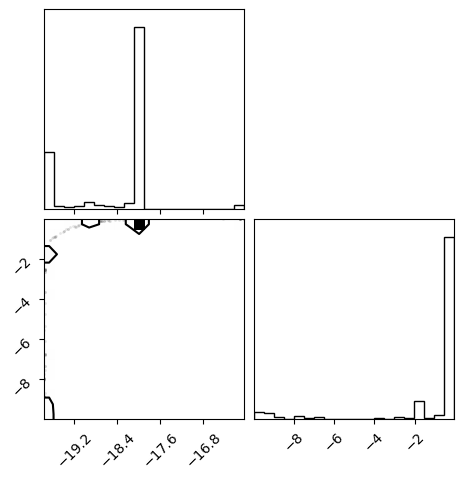

In [21]:
flat_samples = sampler.get_chain(discard=100,thin=15,flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples)

In [17]:
flat_samples

array([[-19.7580827 ,  -6.34627351],
       [-19.5961506 ,  -0.83546715],
       [-19.57529876,  -0.7903739 ],
       ...,
       [-18.01983444,  -0.02780444],
       [-18.0417457 ,  -0.02883045],
       [-18.04675602,  -0.02767996]])

In [18]:
np.median(samples[:,0]), np.median(samples[:,1]) #wants way too small mass?

(-18.028131432575222, -0.028003445941809736)

(array([2.0270e+04, 9.0100e+02, 1.0190e+03, 5.5000e+02, 6.6000e+01,
        2.5900e+02, 8.1000e+01, 9.7000e+01, 8.0390e+03, 6.8305e+04,
        1.0000e+01, 8.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 8.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.0000e+00, 0.0000e+00, 2.7000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.5000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 8.0000e+00, 5.0000e+00,
        7.0000e+00, 5.0000e+00, 1.1000e+01, 1.2000e+01, 0.0000e+00,
        4.0000e+00, 3.9000e+01, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        7.3000e+01, 0.0000e+00, 0.0000e+00, 3.10

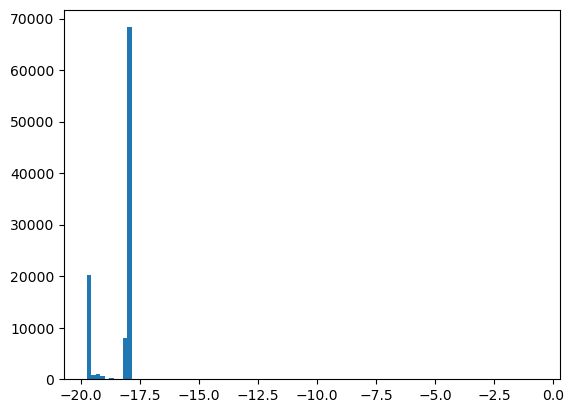

In [19]:
bins=100
plt.hist(samples[:,0], bins=bins)

In [1]:
bins=50
plt.hist(samples[:,1], bins=bins)

NameError: name 'plt' is not defined

In [63]:
from cluster_functions import funr
from scipy.optimize import root
test_cluster=clusters[5]
p0=[-25, -4]

x0 = 1e-5 * u.GeV  # starting estimate (could even do this using T_b_small)
solution = root(funr, x0, args=(test_cluster, p0), method='df-sane').x
solution

/Users/eleanorstuart/opt/anaconda3/envs/idm/lib/python3.11/site-packages/astropy/units/quantity.py:611: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


array(1.5307764e-05)

In [71]:
ndim, nwalkers = 2, 10
log_sigma0 = np.random.uniform(low=-35, high=-15, size=(nwalkers, 1)).astype(dtype=np.float128)
log_mchi = np.random.uniform(low=-10, high=0, size=(nwalkers, 1)).astype(dtype=np.float128)

p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((nwalkers,))
p0[:,1]= log_mchi.reshape((nwalkers,))
p0

array([[-32.80359906,  -2.74248209],
       [-29.9845553 ,  -8.13512737],
       [-22.91462813,  -2.74720403],
       [-33.61657889,  -5.33260911],
       [-20.19559295,  -8.3135042 ],
       [-22.68354138,  -4.17939674],
       [-22.19950193,  -2.61275825],
       [-21.7521397 ,  -7.79526334],
       [-30.99127017,  -4.80141503],
       [-27.82732113,  -8.86566465]])

In [72]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood_2, args=[T_data, variances, clusters, 'pred_T_b'])

In [73]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

[-32.80359906  -2.74248209]
[-29.9845553   -8.13512737]
[-22.91462813  -2.74720403]
[-33.61657889  -5.33260911]
[-20.19559295  -8.3135042 ]
[-22.68354138  -4.17939674]
[-22.19950193  -2.61275825]
[-21.7521397   -7.79526334]
[-30.99127017  -4.80141503]
[-27.82732113  -8.86566465]


[-27.87216083  -2.74483683]
[-36.64789107  -6.06492139]
[-21.42067513  -5.80556491]
[-21.61839155  -7.78974173]
[-25.7908081  -11.48166672]
[-32.50900692  -7.35081527]
[-22.33642938  -5.35593929]
[-22.95177445  -4.4705325 ]
[-36.51699418  -7.0374623 ]
[-22.2834215   -4.03938502]
[-31.18154431  -5.4285744 ]
[-22.02046935  -8.14551663]
[-33.91566629  -3.8500398 ]
[-26.9628662   -2.57855005]
[-14.49752748 -10.16721968]
[-24.3644851   -4.42648977]
[-12.80579028  -5.04473637]
[-28.16827271  -8.81208464]
[-38.4793987  -6.7585341]
[-26.21657253  -3.81818814]
[-12.81485065  -5.04425175]
[-19.73475761  -8.41863987]
[-26.21941944  -8.2258753 ]
[-27.04336223  -1.96709101]
[-29.3845144   -5.10108399]
[-24.23449886  -4.16024431]
[-20.74868454  -0.2424066 ]
[-32.1292228   -5.60250588]
[-22.69369928  -6.29789673]
[-19.87456677 -11.83335204]
[-24.60960728  -2.42694236]
[-25.12959312  -2.58495493]
[-16.11518026  -8.21807182]
[-36.48827971  -3.01310779]
[-24.62735386  -0.24010841]
[-23.02166196  -1.0269

[-39.57584867  -2.61072688]
[-20.99121181  -6.91983988]
[-14.40973281 -15.74671519]
[-32.21237462  -7.30108726]
[-34.23193235 -12.1641871 ]
[-15.69733808 -11.01725734]
[-15.37654821 -17.92389425]
[-22.91669637  -7.12437728]
[-36.51181159  -3.44090071]
[ -8.85911614 -18.54062546]
[-26.10313327  -9.08658156]
[-35.02956957 -19.92910046]
[-16.39029344 -11.32685144]
[-24.2140618   -7.92329346]
[-12.5234199 -16.6961933]
[-36.26107925  -3.66601707]
[-14.73049578 -13.63156116]
[-32.77268162  -8.65030786]
[-16.80220851 -17.48840136]
[-27.92106652  -9.49259032]
[ -9.08471899 -16.20223938]
[-31.4312304  -3.7996258]
[-15.87603102 -18.32504681]
[-20.77034698 -10.81175924]
[-36.98617098  -0.62929617]
[-14.29017482 -13.9997138 ]
[-32.21743862  -3.56333595]
[-27.04161445  -9.65483215]
[-31.15272195 -12.44761111]
[-26.78647052  -9.95511443]
[-18.78188907 -12.11965574]
[-24.98937471 -19.08826308]
[-14.80839237 -13.78280796]
[-31.795595    -7.08330977]
[-19.59394731 -15.60671334]
[-27.57649946 -16.300785

[-34.37401775 -13.59140087]
[-13.07953189 -17.801675  ]
[-15.70683357 -15.36202891]
[-31.17687492 -10.49537255]
[-32.49572493  -6.83503598]
[-29.84830178  -8.98256366]
[-35.83561269  -6.98734357]
[-30.69614429 -10.02984576]
[-31.06363904 -14.40103438]
[-27.36756053 -10.9948829 ]
[-34.19171723  -3.82412739]
[-34.34946851 -10.37822218]
[-11.89037558 -17.86120293]
[-28.04199414  -9.99077891]
[-35.51624275  -4.03470102]
[-37.43766751  -9.81887538]
[ -8.50778622 -17.8720473 ]
[-28.03493292 -10.80139546]
[-35.07693914  -7.3318676 ]
[-36.05462816 -14.33108368]
[-31.34812675  -9.62831259]
[-33.19219158 -12.8708614 ]
[ -8.35769974 -19.9286212 ]
[-25.08914548  -9.37685582]
[-25.09008033 -14.11155441]
[-21.41093396 -15.25780403]
[-28.8763578  -11.17172967]
[-34.71447519 -18.70337388]
[-30.10835927  -7.4483423 ]
[-19.25637882 -15.69432785]
[-32.93146505 -16.40314641]
[-31.5136385  -12.21001973]
[-35.18760511  -6.50127084]
[-28.13290299  -3.97475867]
[-35.75789063  -2.87838937]
[-38.19287404 -10.93

In [74]:
n_steps=1000
sampler.run_mcmc(state, n_steps, progress=True)

[-31.3309095  -16.89819639]
[-26.87199983  -8.86275526]
[-27.43004688 -10.77934704]
[-17.78712907  -8.69673931]
[-6.15182354 -7.76384176]
[-34.7589888   -4.05984801]
[-23.70622934  -8.24726606]
[-35.98633081  -9.69300076]
[-6.32023334 -8.16530662]
[-14.88407627  -4.93895487]
[-17.29934931 -11.63726055]
[-37.57985197 -19.24114935]
[-27.7407696   -8.94189351]
[-12.86082769 -13.98576151]
[-18.2902402  -12.54480974]
[-21.82495672  -8.72741976]
[-38.52225786 -12.46776244]
[-35.48439846  -6.68549459]
[ -8.73482654 -16.1689023 ]
[-13.60181725  -0.51116175]
[-30.72442773 -13.23511588]
[-16.49954485 -14.47870811]
[-9.67880787 -5.88866918]
[-24.74861375 -13.10056002]
[-26.94501616  -6.87971715]
[-17.06401199 -13.21599294]
[-13.64625019  -0.09338689]
[-35.04680232  -6.69544743]
[-14.85811847 -14.10787876]
[-14.73891883  -6.17911006]
[-18.01755033 -11.66536543]
[-15.86882978  -1.53351875]
[-29.99780031  -4.56385255]
[-26.37510994  -9.11009719]
[-19.85360149 -14.03524836]
[-20.13849338 -13.74190606

[-14.21663355  -1.40057392]
[ -7.79011866 -15.62982325]
[-19.5986608   -0.06770808]
[-15.24443174  -4.45481733]
[-31.09984837  -3.69145154]
[-22.8707607   -3.47038883]
[-12.90894113  -6.30714403]
[-8.65266723 -0.10485064]
[-9.58011846 -5.1859832 ]
[ -7.11914202 -18.05073458]
[-25.73578974  -3.54735375]
[-10.88818306  -5.45246523]
[-6.71351396 -0.09494556]
[-25.80141362 -14.3472692 ]
[-13.85424028  -4.75246968]
[-26.52315489 -13.41907949]
[-25.76272766  -4.01981236]
[-29.87210191  -4.43253589]
[-10.53173237  -5.53658832]
[-30.27812244  -0.09474469]
[-8.20022779 -6.08682816]
[-15.47730822  -1.35201059]
[-25.53890559 -15.51107256]
[-14.43187672  -5.38198303]
[-35.77146054  -3.20278534]
[-29.89411737  -4.19732986]
[-12.50985759  -5.57825956]
[-27.38722562  -3.58810063]
[-38.60758398  -0.12373733]
[-10.20812024  -0.7005482 ]
[-12.52974243  -0.77436146]
[-8.1643098 -6.2435351]
[-19.88641304  -0.19777067]
[-12.0203774   -0.03009537]
[-15.95587724 -16.8323519 ]
[-22.00982714  -4.30744007]
[-19

[-29.68033124  -8.02832694]
[-9.24856761 -9.89840413]
[-14.56677588  -0.42633636]
[-10.8556721 -14.7793294]
[-10.74268294 -11.31185431]
[-11.32522335  -6.77421737]
[-12.02240199  -0.05414399]
[-11.14302119 -11.15272424]
[-11.64747202  -3.66807707]
[-14.64746992  -0.03131098]
[-11.93800751  -0.83367766]
[-23.84121303  -8.30683914]
[-26.13704848 -18.71498551]
[-11.59870826  -0.70642544]
[-31.55110798  -3.65872767]
[-11.30683313  -3.38424522]
[-10.8686036   -4.61226514]
[-11.09476625 -11.06984019]
[-10.46687129  -2.7054796 ]
[-25.82653175 -17.02970005]
[ -5.15033067 -10.63820259]
[-27.81372911  -4.09274883]
[-16.57328804  -0.0322021 ]
[-17.94312298  -7.88187359]
[-18.77295445  -7.8656091 ]
[-9.575323  -3.8055281]
[-9.57228035 -5.5078867 ]
[-11.47928518  -0.86560123]
[-26.29999375 -17.64482747]
[-18.99540823  -7.77277557]
[-7.87282755 -7.34174568]
[-11.81759728  -3.46184166]
[-12.02287618  -0.05977651]
[-18.38853128  -7.94385021]
[-14.63930175  -7.79680381]
[-13.69375574  -1.09646783]
[-8.

[-34.8189399 -10.7823314]
[ -7.97273187 -15.5112051 ]
[-15.79067905  -0.02980573]
[-31.23373346  -3.00036815]
[-15.2508715   -8.65430523]
[-16.76722265  -2.20068079]
[-39.88480799 -18.41659225]
[-8.03641884 -9.74438521]
[-12.84888059 -11.5843677 ]
[-33.93841832 -10.68657474]
[-15.40545783  -8.63094774]
[-17.72313165  -7.65905851]
[-25.5987313   -0.02938741]
[-21.05821813 -10.21805532]
[-33.6458928  -15.38815074]
[-9.52925164 -9.5188231 ]
[ -9.94939148 -13.91937078]
[-24.38575079  -9.6270181 ]
[-13.90399865  -0.86479365]
[-28.91077985 -11.99690397]
[-19.61042371  -6.86764481]
[-34.85469606 -11.13577564]
[-33.02730338 -12.21134931]
[-22.36721125  -0.02952523]
[-31.12101911  -3.04046394]
[-15.67136781  -9.91097853]
[-21.23751324  -6.18534396]
[-18.12024016  -3.4919888 ]
[-15.53004971  -5.84908529]
[-15.92387103  -9.94444552]
[-12.72141726  -1.83259134]
[-12.66440464  -0.30079037]
[-35.73797911 -11.65034269]
[-32.10459906  -2.59362892]
[-25.35858534  -5.60370337]
[-15.6410814   -9.22794456

[-31.08285581 -14.35788773]
[-29.85358807  -4.95126349]
[-32.43270619 -13.30759247]
[-17.89537359 -10.80473587]
[-30.4007934  -18.38409877]
[ -5.97909281 -16.7424207 ]
[-18.89530282  -0.59161174]
[-38.62619818 -12.38383838]
[ -5.80091946 -17.11581603]
[-15.46370169  -5.93595243]
[-30.05877193 -13.95280708]
[-30.81580095  -8.6881684 ]
[-32.64128318 -15.99367934]
[-11.85662502  -1.69850754]
[-34.83032668 -12.96474372]
[-24.93627086  -7.43817937]
[-17.56100608  -1.83457893]
[-32.75108247 -16.11559839]
[-39.68079987 -16.86335231]
[-23.22535996 -13.15860817]
[-22.48503054  -4.71636847]
[-16.39713421  -6.19579776]
[-28.30188611 -18.94164196]
[-29.75757043  -8.17101203]
[-16.37390782  -6.13715421]
[-29.0611057  -7.6564999]
[-21.20725715 -11.09043114]
[ -8.39120867 -10.52116123]
[-15.34932584  -3.55022126]
[-21.4735857   -0.02999399]
[-28.51277564 -15.80695166]
[ -6.8848341  -14.35626204]
[-20.45923288  -9.94953901]
[-15.43282089  -3.67355486]
[-25.62498245  -8.69460084]
[-20.71549414 -15.0693

[-11.40017205 -18.2886624 ]
[-13.16994789  -0.02797901]
[-29.56927518  -5.08125182]
[-31.23524453 -15.0547711 ]
[ -7.86798309 -11.54741051]
[-12.28738594  -0.02772875]
[-21.382187    -7.16221119]
[-33.24687024  -2.84535419]
[-21.57937517 -10.23631396]
[-17.070409    -0.02908504]
[ -7.37571485 -11.6940877 ]
[-26.55902756  -4.20100339]
[-18.08099168 -11.12071252]
[-19.44228834  -3.11003637]
[-18.41906689  -0.02950869]
[-25.46392624 -15.99572132]
[-18.96875184 -10.16822155]
[-11.99214391  -6.10449918]
[-29.89447065  -5.18937709]
[-26.53960204 -17.31815896]
[-19.20229733 -10.52267995]
[ -6.22362077 -14.43057858]
[-17.01266686  -5.60572886]
[-12.95218524 -19.44537787]
[-22.77277356  -2.46587624]
[-10.25165911 -17.43267567]
[-16.98505561  -2.21887367]
[-29.85120186  -3.40749033]
[-22.11158132 -14.93818028]
[ -6.43925374 -14.59128984]
[-18.01139649  -8.59373599]
[ -6.65065664 -14.74884843]
[-24.4005685  -12.85791265]
[-26.93178942 -18.1359359 ]
[-13.51466669 -19.86459531]
[-14.29590042  -3.03

[-14.52611284  -1.91024756]
[-23.23267678 -18.84434183]
[-23.81605648  -2.64476611]
[-23.2505785  -14.36008478]
[-12.46525057  -0.02774529]
[-23.98437784  -7.46991637]
[-15.58328455  -2.65065994]
[-23.92593916  -5.79469582]
[-15.40509975  -2.4323747 ]
[-12.47407164  -0.02772944]
[-31.64701499 -19.14450872]
[-12.48868839  -0.02770316]
[-23.75155578  -0.7957697 ]
[-21.17387019 -11.20280459]
[-15.99402754  -2.31687791]
[-19.53674151 -14.41993688]
[-13.28882756  -1.42538692]
[-12.56830319  -0.02813763]
[-29.26396525 -16.58878588]
[-15.7707856   -6.72979654]
[-22.1489214   -9.28672506]
[-19.05416088  -0.47585895]
[ -8.51884602 -12.99181015]
[-25.52184974  -2.22233491]
[-23.14496337  -5.34916245]
[-11.20550045 -10.84074532]
[-26.8289533 -13.9773357]
[-19.41475828  -4.26801847]
[-14.93305108  -0.03845523]
[-24.45238378 -16.53175014]
[-15.58667893  -0.35220535]
[-27.53690309  -1.05390988]
[-19.29438391  -9.41623362]
[-26.4003685  -1.7129274]
[-28.47436312  -8.00686385]
[-25.69575947 -15.195329

[-12.64852869  -5.91181077]
[-12.38305065  -0.02769089]
[-27.97533579 -11.58062811]
[-12.91945058  -4.01247571]
[-15.71496707  -3.62596131]
[-31.809249   -14.42975375]
[-17.01713957  -3.43717882]
[-30.05567289  -8.32638994]
[-24.62554389  -1.08210314]
[-13.33506553  -0.02794413]
[-13.07117784  -5.24568435]
[-14.63227494  -6.44460973]
[-25.4261808  -16.11146201]
[-29.12280078  -5.07950614]
[-12.41011822  -2.01285238]
[-12.91369082  -0.38775115]
[-26.99577769  -0.3393861 ]
[-12.10408611  -0.0277239 ]
[-12.93154034  -8.00667793]
[-7.49059292 -7.37021571]
[-24.8115479  -15.37494003]
[-39.87903735  -8.33455039]
[-12.39378995  -0.02768962]
[-31.2369891  -12.75459005]
[-23.34654284 -15.97238164]
[-20.50043141  -2.47775823]
[-12.44028715  -0.02769886]
[-12.61878079  -5.31567253]
[-9.87517586 -4.37452103]
[-32.1264128  -13.35531644]
[-25.34946668 -19.16226992]
[-12.35369532  -0.02770618]
[-33.2361862   -6.35495412]
[-27.28864183 -10.08783361]
[-18.23163685  -7.14155576]
[-12.58984128  -0.964151

[-27.39099416  -4.08152621]
[-7.98829719 -9.41123276]
[-30.06196609  -6.75270258]
[-11.37768523  -0.02770068]
[-31.55682393  -8.80292049]
[-12.96437503  -6.6457764 ]
[-12.92936037  -0.02791631]
[-26.68576534  -7.15932876]
[-15.71143837  -7.17065791]
[-13.64257575  -0.02801542]
[-23.4672973   -1.22071947]
[-10.18748415  -5.23487101]
[ -5.27473405 -10.19846961]
[-29.58761605 -13.09215526]
[-12.62896246  -0.02807207]
[-39.02735696  -5.50638963]
[-20.40143763  -9.17206052]
[-17.29766409  -3.18728555]
[-13.38495263  -0.02778561]
[-30.49434225 -12.87994329]
[-6.94027261 -7.4227948 ]
[-24.42985794 -13.25432289]
[-13.12430017  -0.0279434 ]
[-19.18801388  -0.04208663]
[-35.56137602 -16.98283581]
[-22.48281641 -13.37451986]
[-13.33755222  -0.0276844 ]
[-28.62321662  -2.64080204]
[-11.76705218  -0.02769745]
[-32.99326346 -14.90337665]
[-28.48129534 -11.54107938]
[-30.55420813 -12.92102831]
[-13.30248797  -0.02797569]
[-14.89326299  -0.03375915]
[-26.69061781 -19.3754437 ]
[-22.71844618  -2.028289

[-18.26498516  -7.7781725 ]
[-13.98178836  -0.02953594]
[-17.49088874  -0.75696013]
[-21.67158898  -5.23972413]
[-26.11377993  -1.92960267]
[-27.29816832 -13.60346561]
[-26.38083832  -4.56184984]
[-7.73050576 -0.02799625]
[-14.67709938  -5.44466718]
[-17.75105882  -6.69504741]
[-23.35232423 -14.75673392]
[-27.2633849  -13.26062463]
[-16.17411022  -1.54654685]
[-18.26431726 -10.65640326]
[-14.41836719  -0.02783047]
[-18.89301693  -2.87140331]
[-8.1554911  -0.02792553]
[-23.79212916 -14.58849407]
[-14.0249996   -0.02781823]
[-29.55228205  -7.91132596]
[-25.07515228 -11.6386152 ]
[-16.88905766  -3.61841756]
[-37.62220342  -8.83272838]
[-9.0786669 -0.0278725]
[-21.20684326  -7.23927637]
[-23.71310118 -14.47068046]
[-26.05290316  -7.51177607]
[-16.1654418   -0.02773486]
[-22.31076872  -8.33678714]
[-24.52444262 -14.06561427]
[-14.61456896  -5.05912279]
[-26.55585845  -5.35516982]
[-18.51121253  -4.51652236]
[-34.30088657  -8.72515009]
[-9.70895821 -0.02786688]
[-23.22982932 -10.71524916]
[-

[-28.48133624 -15.45530037]
[-7.18805392 -0.02778718]
[-32.74803481  -9.69870993]
[-28.99585084 -16.4500477 ]
[-12.81785136  -0.02782294]
[-24.97940903 -13.97027863]
[-38.01195961 -11.35179525]
[-21.81341061 -10.54424567]
[-22.57716332 -16.66755151]
[-20.63534006  -7.66507958]
[-27.78172665 -15.17428326]
[-27.25966639 -11.40997586]
[-27.4216529   -6.48573019]
[-20.86277349  -2.92261394]
[-24.4205418  -13.97294991]
[-23.6410393  -14.43156874]
[-18.82372376  -0.0277907 ]
[-12.17804687  -0.027923  ]
[-8.30357524 -0.02779427]
[-29.30514421  -9.56345366]
[-25.78080223 -10.10094005]
[-16.66282955  -0.02791151]
[-26.68009341  -6.15780719]
[-22.70523139 -11.91134002]
[-5.46021028 -0.02781733]
[-26.92340446  -6.98359083]
[-17.01014372  -0.02789195]
[-11.95452914  -0.02795796]
[-35.87762299 -17.08229066]
[-37.42998179  -9.26322989]
[-21.90635258  -1.54919959]
[-20.34648917 -14.66686708]
[-26.28141394  -6.53313433]
[-37.27234035 -10.05725254]
[-23.13557778 -13.33360176]
[-19.58548978 -15.03064688

[-27.32109128 -16.24228141]
[-20.38670007  -4.7304475 ]
[-10.62589179  -0.96803661]
[-9.74139896 -4.37699863]
[-16.1288715   -0.02774812]
[-23.57317382  -8.24985368]
[-37.24452182 -12.49551089]
[-16.3385675   -0.02783745]
[-18.51577979  -0.02768227]
[-5.03833294 -7.47747909]
[-20.94792676  -1.06717349]
[-31.06402698  -8.8462298 ]
[-28.3058383   -3.56370551]
[-16.24068951  -0.02779576]
[-33.52681306  -8.66463674]
[-22.5513316  -14.36612227]
[-17.15501724  -0.02771981]
[-19.8028401   -0.02768784]
[-24.70666957  -1.91896824]
[-20.42176719  -3.53747539]
[-7.19104667 -6.44479362]
[-17.3648109   -0.02776858]
[-20.36864615  -7.77035766]
[-24.74133352 -14.98668831]
[-19.57167689  -0.02769952]
[-34.81184994  -7.09551179]
[-25.57568149  -5.01066809]
[-16.66471005  -1.90015101]
[-13.15044969  -0.02776523]
[-23.00504606  -7.64717421]
[-12.57904637  -3.86009834]
[-16.89728613  -0.02780365]
[-11.7670594   -0.02778662]
[-24.85347462 -13.42632869]
[-17.07789488  -0.0277449 ]
[-19.03519991  -3.62813204

[-6.26472458 -0.93691699]
[-23.71018751  -6.86893639]
[-13.78561956  -8.42453117]
[-18.28086787  -6.29195547]
[-11.34163994  -0.02781034]
[-19.45885736  -8.08848461]
[-19.12638273  -9.62232238]
[-12.08816536  -0.02781046]
[-19.16270145  -5.14148043]
[-28.51419489  -3.48324688]
[-11.60346775  -0.02770956]
[-14.25862533  -8.95339573]
[-12.63617138  -0.02780231]
[ -5.71289697 -16.50481107]
[-7.95282357 -1.90292127]
[-17.74815662  -2.65549318]
[-14.86461844  -0.02775105]
[ -7.63870854 -11.92148644]
[-26.42754304  -8.02424463]
[-33.26237172  -5.24558696]
[-24.6556957  -18.88239729]
[-14.24373497  -8.20155232]
[-13.78130187  -8.98984151]
[-15.84770798  -0.70761963]
[-21.47591327  -2.26398099]
[ -8.26564547 -17.39241467]
[-26.66876171  -6.54601957]
[-29.92224143 -10.53784185]
[-19.086158   -0.0277223]
[-6.34634746 -0.02780686]
[-26.67797892 -15.67819945]
[-11.07335157 -13.11514389]
[-17.37880706  -0.02771109]
[-11.6261074   -0.02776295]
[ -7.68665379 -18.27445292]
[-25.96956429  -6.84053666]


[-23.2819363   -4.45725516]
[-15.39268198 -15.64620044]
[-21.53007211  -6.94183885]
[-11.44703909  -0.02773638]
[-14.29045495  -0.02775683]
[-17.40930897  -7.08694182]
[-14.61006575  -2.96325938]
[-18.16913188  -8.80671787]
[-10.11904441  -4.5865212 ]
[-22.61757799  -6.33841637]
[-15.58383541 -15.17531472]
[-23.73079894 -11.66649579]
[-11.09487368  -0.02773385]
[-9.47873039 -0.75789647]
[-11.47491125 -13.93984402]
[-14.77463623  -0.02774807]
[-24.80003625  -7.38870447]
[-35.88846041  -9.41136757]
[-32.02390651 -12.69269172]
[-8.34741097 -0.02771666]
[-22.64753728 -16.05338128]
[-16.09063565  -0.02773223]
[-24.63958074 -16.70212563]
[-31.07178968  -6.34976934]
[-30.6035391  -13.46390218]
[-26.52416458 -11.58802517]
[-17.7658697   -1.57867822]
[-14.67416146  -0.02767171]
[-8.42171945 -0.02771767]
[-24.65895508 -10.58393504]
[-22.95820174 -19.40823089]
[-14.85824987  -0.18294798]
[-11.7497106   -0.95662128]
[-18.06108415  -0.02769896]
[-35.56781969  -3.38120127]
[-26.82017216 -11.17220488

[-31.06594377 -13.13323111]
[-22.0111641   -2.43166259]
[-5.05335962 -0.02788756]
[-7.73780407 -0.02781973]
[-19.30692526  -4.9517885 ]
[-17.01002106  -0.02771998]
[-18.94987042  -2.09866227]
[-22.95520335  -4.36961235]
[-24.56349184  -0.02788399]
[-28.67652602  -8.48499116]
[-13.7173502   -0.02776613]
[-19.71216521  -2.21225487]
[-14.18986132  -0.02784437]
[-26.36830136  -6.86227002]
[-24.09827593  -2.63084862]
[-9.72053787 -0.0277984 ]
[-18.85874821  -1.52231418]
[-26.82128897  -9.1755848 ]
[-24.95100606  -3.72122237]
[-13.30672648  -2.98259639]
[-8.62888257 -0.02781015]
[-36.01010459 -11.1104154 ]
[-28.37454575  -8.28888705]
[-12.97193422  -0.02783688]
[-30.7535266   -8.04426821]
[-27.66233615  -8.69546158]
[-13.37187625  -0.29200579]
[-15.06732362  -0.02777622]
[-19.18227124  -1.55733539]
[-30.32130082 -11.48740558]
[-27.61111844  -4.21498356]
[-14.9770045   -0.02777669]
[-18.48719742  -0.97225441]
[-6.02993078 -0.02773475]
[-27.29771224  -4.15681015]
[-11.29332269  -0.02782655]
[-

[-35.99268747  -8.85359104]
[-19.91498239  -5.0974567 ]
[-19.54057895  -0.02770031]
[-12.18692111  -1.11746337]
[-38.16466482  -5.63229547]
[-13.9130875  -0.0278398]
[-17.41365952  -4.78851927]
[-7.55807664 -0.02777845]
[-14.50015788  -1.6443038 ]
[-31.44924866  -7.4255451 ]
[-29.31698438  -6.02412527]
[-7.28525234 -0.02783793]
[-16.4395617   -3.08048505]
[-17.9362264   -5.35246708]
[-21.0053211   -0.02769575]
[-14.48851761  -1.64159326]
[-21.54549661  -8.1967698 ]
[-38.01882924  -9.45977867]
[-14.29164434  -0.92821381]
[-19.40495836  -0.02770074]
[-25.12145624  -4.84875991]
[-3.07440997e+01 -2.77002808e-02]
[-19.10519043  -6.73451361]
[-18.86528741  -2.61207869]
[-8.5133013  -0.15551431]
[-8.93799937 -1.64630825]
[-17.34018961  -0.93537182]
[-7.39035808 -0.02770122]
[-34.00250665  -7.42461533]
[-12.29735526  -0.02776745]
[-19.65161053  -8.52984853]
[-19.3457364   -3.14028883]
[-20.76381457  -1.24769105]
[-20.74615111  -0.51377562]
[-6.9986092  -0.02778212]
[-18.65854208  -0.02770563]


[-23.04687491 -15.52154761]
[-13.16163994  -2.60621854]
[-15.81919099  -0.02768945]
[-13.63523485  -0.02770034]
[-13.58803475  -0.29764076]
[ -7.05297057 -15.04437017]
[-9.90075617 -6.98778362]
[-7.98728613 -0.40312884]
[-26.54318599  -0.39137682]
[-15.84774311  -0.02768931]
[-10.33999779  -0.02776531]
[-9.70483965 -0.85923815]
[-14.89121177  -0.063087  ]
[-9.80237369 -8.54670653]
[-32.89409612 -15.81533903]
[-7.87011121 -0.02771399]
[-34.63763576 -11.54165781]
[-9.67111026 -0.02768547]
[-33.86908682 -13.4254883 ]
[-12.65714564  -0.02773333]
[-7.39921977 -5.76553417]
[-12.92102714 -16.35459822]
[-27.22360428  -0.4369104 ]
[-22.53776843  -4.12716673]
[-12.63710639  -0.02781304]
[-8.81414127 -0.02774467]
[-10.30436836 -12.68972614]
[-11.32168225  -0.02772161]
[-10.99749068  -0.02768629]
[-34.7456343  -11.27693694]
[-12.93661979 -17.25124919]
[-35.3538186  -17.83172043]
[-11.14578009  -0.02768708]
[-39.31839445  -0.80114173]
[-10.11211244 -15.58290177]
[-15.02233499  -4.91118774]
[-13.044

[ -8.92530592 -19.28946126]
[-10.20507197  -0.02767593]
[-36.96096749 -14.17052004]
[-10.97051183  -0.0277144 ]
[-9.99283564 -1.73348249]
[-9.65658565 -8.28295487]
[-9.19777198 -4.58640052]
[-11.70825615  -0.02771083]
[ -9.25905443 -16.97947365]
[-13.71252442  -0.02772566]
[-15.42732388  -0.02783625]
[-13.5473131   -0.65658827]
[-33.49299266 -12.22827686]
[-8.78159317 -6.0797703 ]
[-14.00587337  -0.02779514]
[-21.09575016 -14.65882439]
[-11.3165971  -2.3246532]
[-12.457553    -0.02773832]
[ -8.92277967 -19.37458619]
[-25.84276393  -0.38075445]
[-23.1185353   -7.59521008]
[-9.09985779 -5.60832293]
[-16.87935704  -0.05186858]
[-10.80375398  -3.08433091]
[-13.62540747  -0.02780936]
[-15.09492129  -0.0277359 ]
[-9.38225943 -4.18236958]
[-23.37256281  -0.02769462]
[-14.93869815  -4.75074671]
[-22.90817017  -0.26439229]
[-13.50147032  -0.02781556]
[-10.9495369   -0.02770521]
[-14.97059627  -3.7863879 ]
[-9.67773626 -7.98398721]
[-13.48947423  -8.35238596]
[-15.04580167  -1.51274314]
[-35.194

[-14.61055979  -2.95971486]
[ -8.81067785 -18.44927383]
[-10.0893763   -0.02772257]
[-15.43360276  -0.02771914]
[-21.72296003  -7.45227623]
[-13.56868166 -15.01679421]
[-14.86476979  -0.02772951]
[-10.25824597 -16.6002193 ]
[-20.23130314  -9.05305923]
[-10.57308741  -0.02775199]
[ -9.31824574 -17.59089071]
[-20.9627913   -5.85147522]
[-13.46996627 -14.59152194]
[-11.14736234  -0.02779727]
[-10.44570409  -9.93869742]
[-20.47541165  -7.98464293]
[-10.73238412  -7.76266132]
[-14.32140907  -1.74829031]
[-10.24755113 -15.55065128]
[-21.35923244  -7.6848564 ]
[-15.91461145 -12.28596189]
[-16.72811585  -2.67029406]
[-17.58704733 -10.87263048]
[-10.34247268 -14.66217658]
[-17.6715906   -4.00831333]
[-21.06533025  -7.92664764]
[-18.73421108  -0.02770054]
[-11.87585683  -0.02778399]
[-18.12968684  -0.02773425]
[-20.42342825  -5.89828463]
[-14.9499193   -7.05819123]
[-10.25634388  -0.26923064]
[-20.91292588  -7.51657437]
[-16.5880916   -3.77034987]
[-12.74639431  -2.01871068]
[-21.264628    -5.01

[-14.58781985  -0.02774008]
[-21.46729587  -0.02769175]
[-12.53294999  -0.02769065]
[-9.39182606 -4.89239756]
[-8.09306795 -5.44908722]
[ -7.7914858  -10.11083289]
[-9.03769321 -5.04419033]
[-11.41082049  -3.13884011]
[-19.2727015  -17.89962975]
[-7.94622647 -7.71890866]
[-13.56883251  -0.02780631]
[-19.39542927  -0.02770731]
[-11.98583057  -1.54460138]
[-9.88380638 -4.36485808]
[-10.9140242   -4.51622796]
[ -7.88017253 -10.03376949]
[-9.18825534 -4.92376099]
[-18.89768266  -0.027747  ]
[-13.61858935  -5.04743208]
[-17.43030127  -0.7676794 ]
[-9.82815133 -6.35208756]
[-17.39919215  -1.76231673]
[-6.88638862 -5.80709373]
[-10.2431156   -4.95320701]
[-14.20760281  -0.02770547]
[-10.22571984  -2.91908521]
[-10.36039408  -4.9564808 ]
[-20.80610053  -0.02771156]
[-13.11552895  -5.03338934]
[-18.87043219  -0.02774676]
[-12.97387556  -0.54235267]
[-9.95813715 -5.22966052]
[-20.44865282  -0.02771806]
[-10.30408035  -4.10454839]
[-14.63831934  -2.73653144]
[-9.75459546 -0.02769649]
[-14.7404366

[-22.34261343 -17.3212742 ]
[-8.17949913 -0.02784792]
[-21.34272268 -17.01868715]
[-11.8911843   -3.01978136]
[-12.98727691  -0.90256634]
[-17.17593355  -0.0277268 ]
[-19.19051071 -11.89369556]
[-8.85502004 -0.16050157]
[-10.55671913  -9.09685861]
[ -5.09930872 -19.54499233]
[-14.78894894  -0.02778466]
[-9.93837925 -1.54856135]
[-14.86940689  -5.00556123]
[-18.15509004  -4.02044364]
[-17.78866681  -7.00538016]
[-20.98922023 -15.57720644]
[-10.94604279  -7.76829883]
[-7.87481621 -9.22292147]
[-14.98349282  -6.69897405]
[-11.15310826  -7.81888048]
[-21.73451901 -18.61631922]
[ -8.44061695 -13.15949918]
[-22.00462326  -0.02782091]
[-11.32164082  -0.02781785]
[-18.55820499  -0.0277053 ]
[-17.0321069   -0.02778443]
[-23.70468941 -11.3621495 ]
[ -5.31191533 -10.32057166]
[-9.90867129 -8.35185329]
[-22.2672576  -19.56733504]
[-14.30491071  -0.02788572]
[-22.60580195 -10.35632652]
[-18.9261904   -0.02775719]
[ -8.12451247 -13.22205364]
[-9.75891358 -0.02783281]
[-11.19770184  -7.79978175]
[-24

[-12.10088651  -1.83209185]
[-11.80946682  -7.14670464]
[-29.33352072 -17.17019583]
[-14.58275129  -3.32269097]
[-17.67696561 -16.02471264]
[-30.45656752  -9.09940295]
[ -7.59655278 -15.09539077]
[-5.44029129 -0.02770517]
[-15.73510389  -0.02770428]
[-37.46905377 -17.96967014]
[-20.69208488  -0.02774237]
[-10.47003463  -9.77543603]
[-12.13811635  -8.78377358]
[-19.03993299  -4.59354617]
[-13.42781333  -4.68129983]
[-27.35423021  -7.51003067]
[-26.97056254 -14.16254477]
[ -9.19940543 -10.53081584]
[-10.93677038  -9.49796502]
[-11.61755998  -3.37620742]
[-8.62721198 -8.82606413]
[-11.10932614 -10.21302372]
[-14.91961902  -0.02770716]
[-15.14333424  -0.02772313]
[-25.13554074  -5.01820958]
[-31.19169989 -15.21362745]
[-6.04369236 -5.6751558 ]
[-22.41819169  -7.98931035]
[-7.97243275 -0.89228304]
[-10.65812008  -0.02780576]
[-14.03363914  -0.02771029]
[-8.85191201 -9.4464095 ]
[-13.66793497  -0.02771159]
[-20.80341501  -4.57433653]
[-3.44927580e+01 -2.77760355e-02]
[-19.97509728 -12.420641

State([[-1.89362713e+01 -7.16332841e+00]
 [-7.80945750e+00 -2.76824921e-02]
 [-3.16205940e+01 -2.19375170e+00]
 [-1.14045582e+01 -9.85406229e+00]
 [-1.64612596e+01 -2.77238286e-02]
 [-8.52835221e+00 -3.75059514e+00]
 [-1.07326268e+01 -1.55725763e+01]
 [-7.16205431e+00 -2.77054898e-02]
 [-1.30650281e+01 -2.77645587e-02]
 [-1.00523548e+01 -2.76905345e-02]], log_prob=[-7131.62552308  -539.06499668 -7131.62552308 -7131.62552308
  -539.6459812  -7131.62552308 -7131.62552308  -539.38815929
  -540.2188642   -539.17799094], blobs=None, random_state=('MT19937', array([  16764854, 4099049370,  169583744,  761553761, 3954497282,
       3430021922, 3374742232,  720964522, 3200308159,   60152745,
       2021730518, 1988332661,    7419546, 3199264626, 3275069770,
       1503725392, 1656787721,  274343877, 3987460918, 1651297207,
       2634169082,  423128451,  911518712,  979716529, 3582747901,
       3753779070, 4256383926, 3115758884, 3363614438,  229616900,
       2571976935, 1015212107, 31828979

In [68]:
samples = sampler.get_chain(flat=True)

(5000, 2)


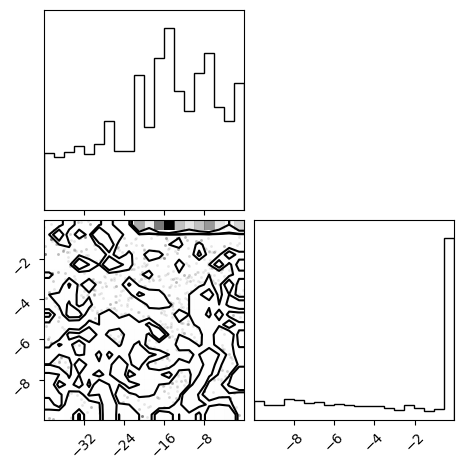

In [70]:
flat_samples = sampler.get_chain(flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples)